## Import data

df

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
# Load CSV dataset
# df=pd.read_csv("/content/HousePriceDataset (1).csv")
# Load CSV in YW 
df=pd.read_csv("HousePriceDataset.csv")
print(f"Number of houses in dataset: {len(df)}")
print(f"Number of variables in dataset: {len(df.columns)}")
df=df.drop(columns=['Unnamed: 0'])
# Display the column names (features) in the dataset
print(f"Features in the dataset: {list(df.columns)}")

# Display basic statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

Number of houses in dataset: 21613
Number of variables in dataset: 21
Features in the dataset: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Summary Statistics:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.90000

## Data pre-processing
X is the data we want to use in dimensionality reduction and clustering

In [2]:
### Clean the data  'sqft_lot15'
def clean_data(value):
    if isinstance(value, str) and value.startswith("b'"):
        return float(value[2:-1])
    return float(value)

df['sqft_lot15'] = df['sqft_lot15'].apply(clean_data)
X = df.drop(['price','id'], axis=1)
y = df['price']

## Dimensionality reduction

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

2023-11-15 12:56:48.423090: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data standardization

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## First reduction then clustering

PCA, AutoEncoder & T-SNE

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

/Users/wangyuhang/Documents/荷兰课程/Semester-3/IML/Final_Assignment/IML/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/wangyuhang/Documents/荷兰课程/Semester-3/IML/Final_Assignment/IML/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [6]:
# Split the data as training data and test data
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

input_dim = X_train.shape[1]  # Current dimensionality
encoding_dim = 2  # reduce to 2

# encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# autoencoder
autoencoder = Model(input_layer, decoded)

# model compile
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# training
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# builde the encoder
encoder = Model(input_layer, encoded)

# 对数据进行降维
X_ae = encoder.predict(X_scaled)

2023-11-15 12:58:42.845415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
68/68 [==============================] - 1s 3ms/step - loss: 1.2301 - val_loss: 1.2725
Epoch 2/50
68/68 [==============================] - 0s 1ms/step - loss: 1.1958 - val_loss: 1.2386
Epoch 3/50
68/68 [==============================] - 0s 1ms/step - loss: 1.1632 - val_loss: 1.2054
Epoch 4/50
68/68 [==============================] - 0s 1ms/step - loss: 1.1306 - val_loss: 1.1720
Epoch 5/50
68/68 [==============================] - 0s 1ms/step - loss: 1.0958 - val_loss: 1.1337
Epoch 6/50
68/68 [==============================] - 0s 1ms/step - loss: 1.0499 - val_loss: 1.0795
Epoch 7/50
68/68 [==============================] - 0s 1ms/step - loss: 0.9948 - val_loss: 1.0291
Epoch 8/50
68/68 [==============================] - 0s 1ms/step - loss: 0.9520 - val_loss: 0.9947
Epoch 9/50
68/68 [==============================] - 0s 1ms/step - loss: 0.9238 - val_loss: 0.9725
Epoch 10/50
68/68 [==============================] - 0s 1ms/step - loss: 0.9055 - val_loss: 0.9582
Epoch 11/50
68/68 [

## Color by labels

In [7]:

y = df['price']

# 自定义价格区间
bins = [0, 200000, 400000, 600000, 800000, np.inf]
price_bins = pd.cut(y, bins, right=False, labels=False)

# 为每个价格区间指定一种颜色
colors = ['blue', 'green', 'yellow', 'orange', 'red']

def visualize_clusters_with_price(X, title):
    plt.figure(figsize=(8, 6))

    # 使用指定颜色画每个点
    for i in range(len(bins) - 1):
        mask = price_bins == i
        plt.scatter(X[mask, 0], X[mask, 1], color=colors[i], s=25, label=f'{bins[i]}-{bins[i+1]}k')

    plt.title(title)
    plt.legend()
    plt.show()

In [8]:
reduced_data = {
    'pca': X_pca,
    'tsne': X_tsne,
    'ae': X_ae
}

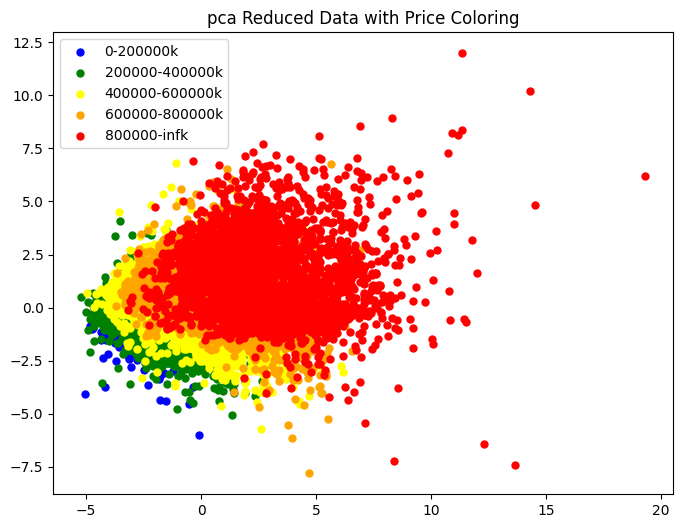

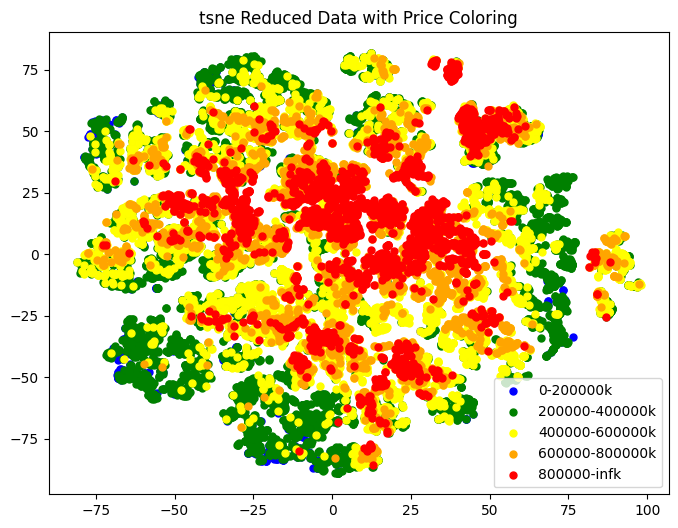

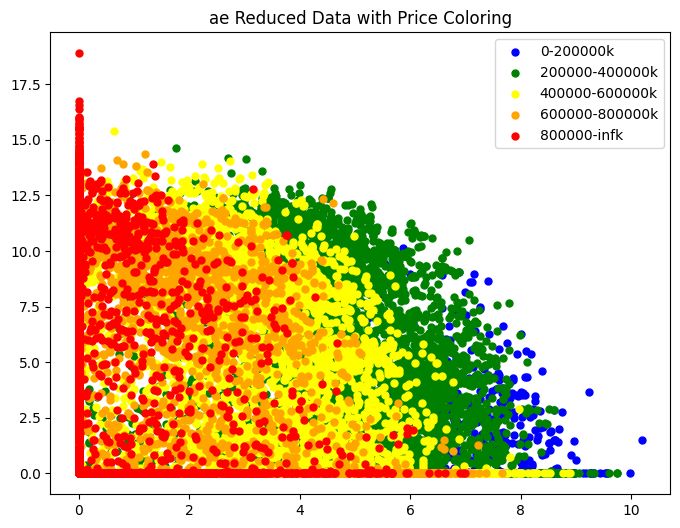

In [9]:
for key,values in reduced_data.items():
    name = key
    X = values
    visualize_clusters_with_price(X, f'{name} Reduced Data with Price Coloring')

## Clustering

### K-means

In [17]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
# clustering on original dataset
kmeans_orig = KMeans(n_clusters=5, random_state=42)
k_clusters_orig = kmeans_orig.fit_predict(X_scaled)

# clustering on reduced dataset by pca
kmeans_pca = KMeans(n_clusters=5, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)
# Tsne
# clustering on reduced dataset by pca
kmeans_tsne = KMeans(n_clusters=5, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(X_tsne)

# AutoEncoder
kmeans_ae = KMeans(n_clusters=5, random_state=42)
clusters_ae = kmeans_ae.fit_predict(X_ae)

### Hierarchical Clusering

In [18]:
H_orig = AgglomerativeClustering(n_clusters=5, linkage='ward')
H_clusters_orig = H_orig.fit_predict(X_scaled)

H_pca = AgglomerativeClustering(n_clusters=5, linkage='ward')
H_clusters_pca = H_pca.fit_predict(X_pca)

H_tsne = AgglomerativeClustering(n_clusters=5, linkage='ward')
H_clusters_tsne = H_tsne.fit_predict(X_tsne)

H_ae = AgglomerativeClustering(n_clusters=5, linkage='ward')
H_clusters_ae = H_ae.fit_predict(X_ae)

## Data Visualization

In [33]:
reduced_data = {
    'pca_kmeans': [X_pca, clusters_pca],
    'pca_Hierarchical':[X_pca, H_clusters_pca],
    'tsne_kmeans': [X_tsne, clusters_tsne],
    'tsne_Hierarchical':[X_tsne, H_clusters_tsne],
    'ae_kmeans': [X_ae, clusters_ae],
    'ae_Hierarchical':[X_ae, H_clusters_ae]
}

In [34]:
def visualize_clusters(X, clusters, title):
    plt.figure(figsize=(8, 6))

    # 使用指定颜色画每个聚类的点
    unique_clusters = np.unique(clusters)
    for i, cluster in enumerate(unique_clusters):
        mask = clusters == cluster
        plt.scatter(X[mask, 0], X[mask, 1], color=cluster_colors[i], s=25, label=f'Cluster {cluster}',alpha=0.9)

    plt.title(title)
    plt.legend()
    plt.show()

In [39]:
cluster_colors = ['blue', 'green', 'yellow', 'orange', 'red']

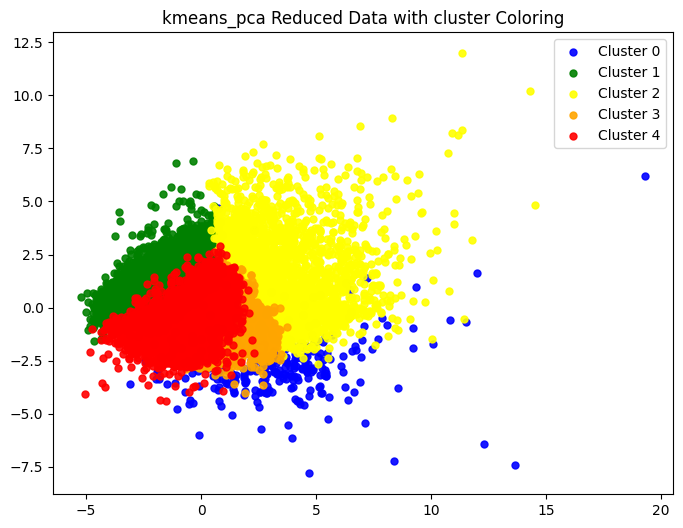

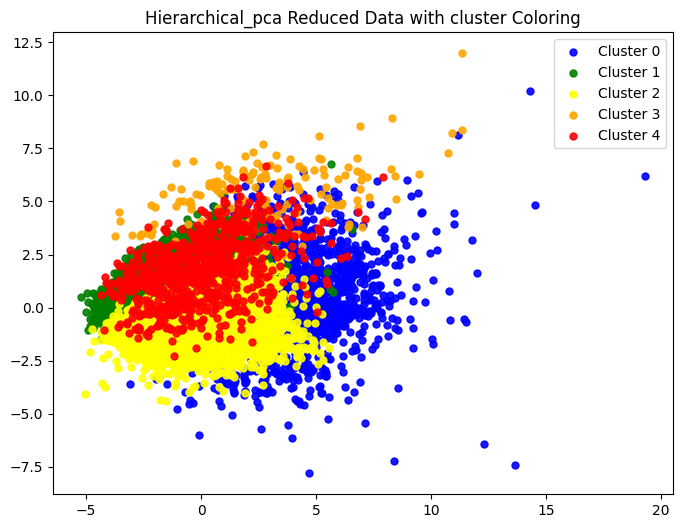

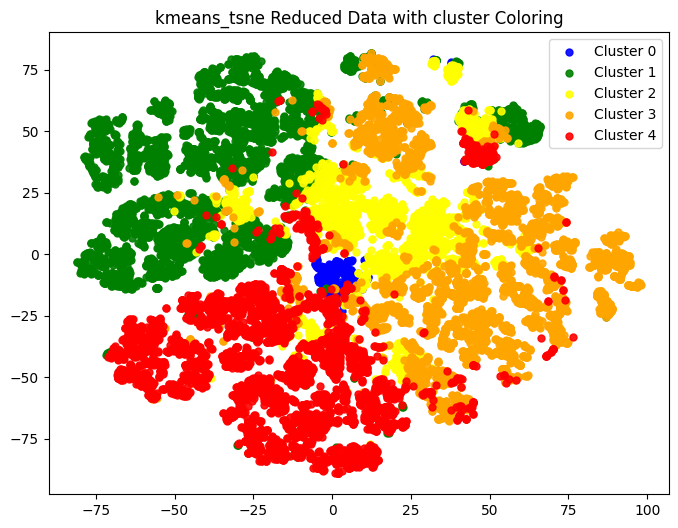

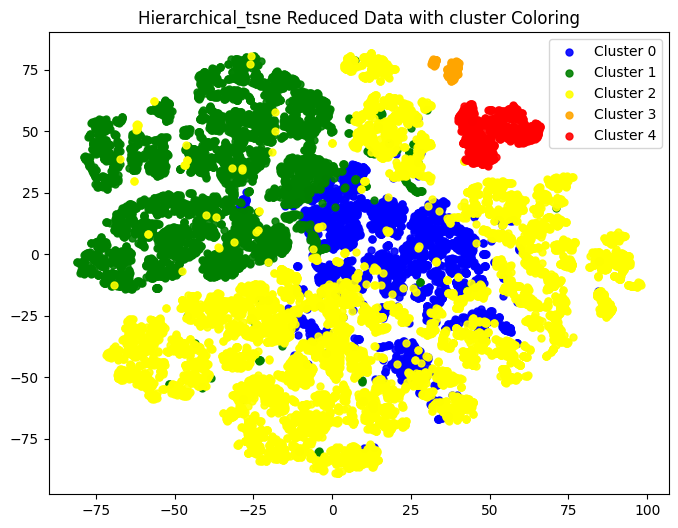

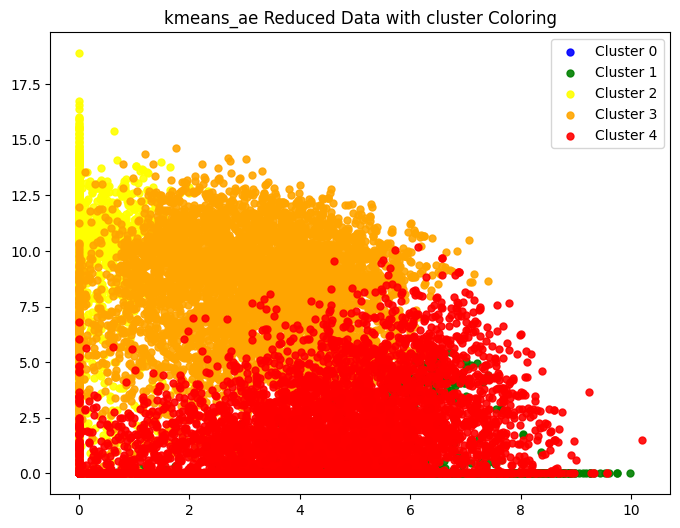

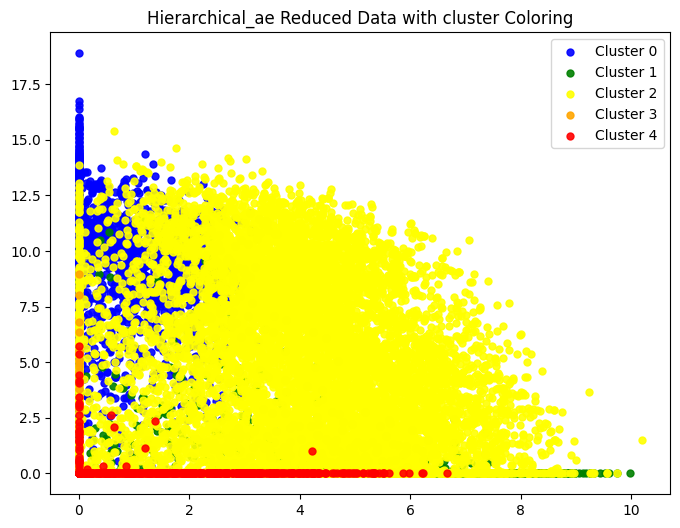

In [40]:
for key,values in reduced_data.items():
    name = key
    X = values[0]
    clusters = values[1]
    visualize_clusters(X,clusters ,f'{name} Reduced Data with cluster Coloring')

## First clustering then reduction

In [32]:
kmeans = KMeans(n_clusters=5)
K_clusters = kmeans.fit_predict(X_scaled)
H = AgglomerativeClustering(n_clusters=5, linkage='ward')
H_clusters = H.fit_predict(X_scaled)

In [41]:
reduced_data_2 = {
    'kmeans_pca': [X_pca, K_clusters],
    'Hierarchical_pca':[X_pca, H_clusters],
    'kmeans_tsne': [X_tsne, K_clusters],
    'Hierarchical_tsne':[X_tsne, H_clusters],
    'kmeans_ae': [X_ae, K_clusters],
    'Hierarchical_ae':[X_ae, H_clusters]
}

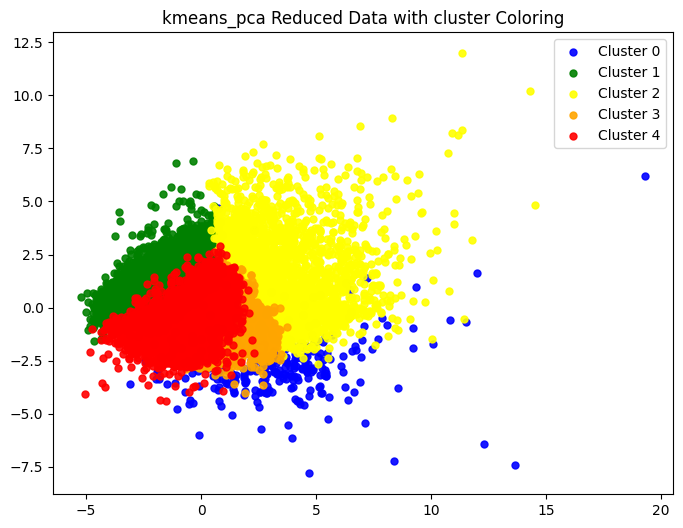

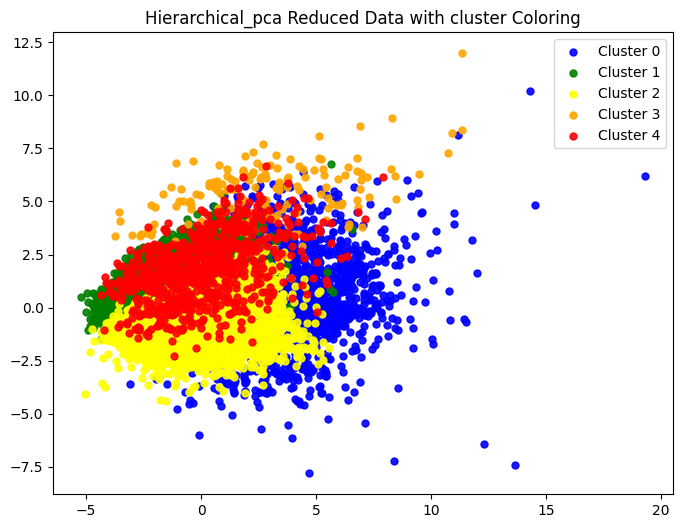

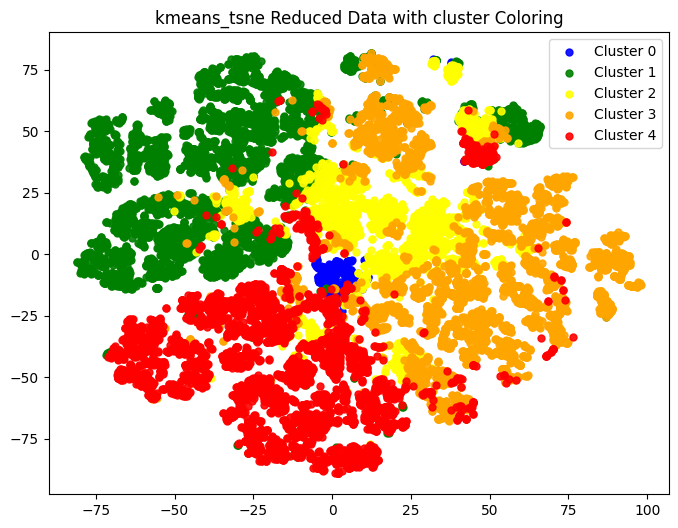

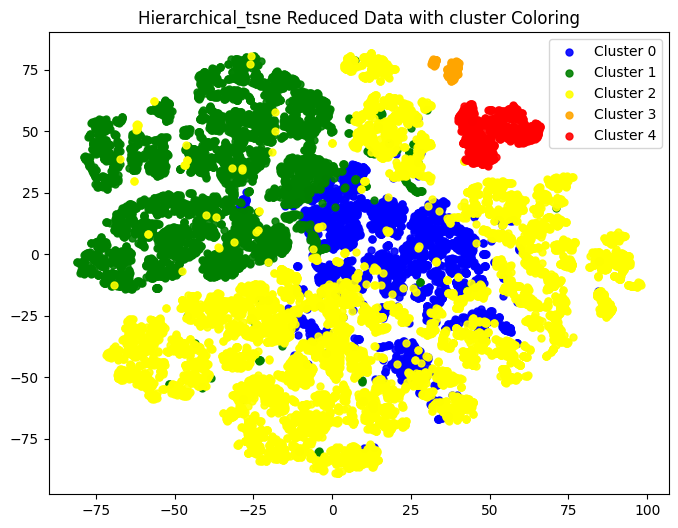

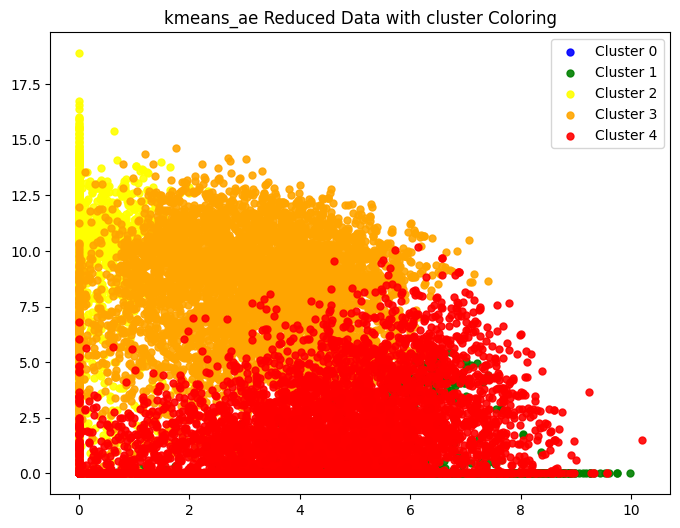

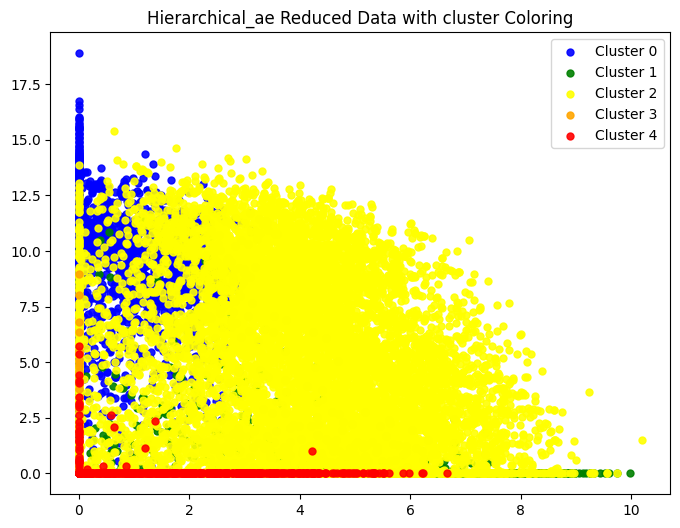

In [42]:
for key,values in reduced_data_2.items():
    name = key
    X = values[0]
    clusters = values[1]
    visualize_clusters(X,clusters ,f'{name} Reduced Data with cluster Coloring')